In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
df_train=pd.read_csv('/content/Mall_Customers.csv')
df_train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_train.shape

(200, 5)

In [4]:
df_train.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
counts=df_train['Gender'].value_counts()
counts

Female    112
Male       88
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7febe5201650>,
 [Text(-0.20611945413751356, 1.080515974257694, '112'),
  Text(0.20611945413751367, -1.080515974257694, '88')])

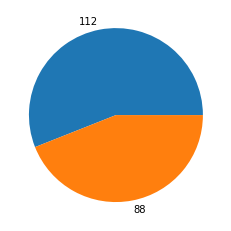

In [6]:
import matplotlib.pyplot as plt
plt.pie(counts, labels=counts)

In [7]:
df_train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df_train.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

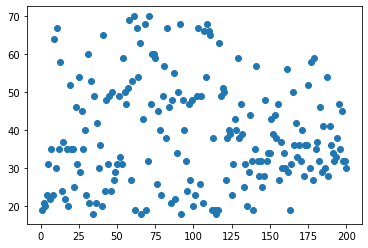

In [9]:
plt.scatter(df_train['CustomerID'] ,df_train['Age'])

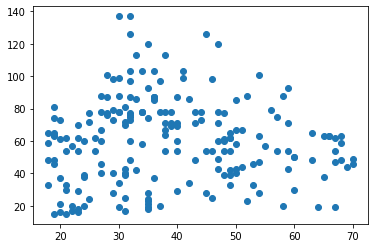

In [10]:
plt.scatter(df_train['Age'] ,df_train['Annual Income (k$)'])

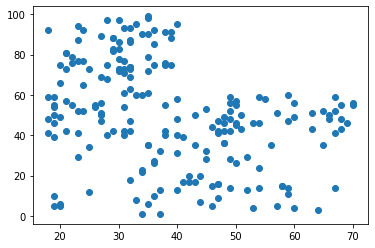

In [11]:
plt.scatter(df_train['Age'] ,df_train['Spending Score (1-100)'])

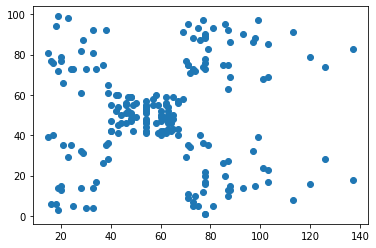

In [12]:
plt.scatter(df_train['Annual Income (k$)'] ,df_train['Spending Score (1-100)'])

In [13]:
df1=df_train.pivot_table(df_train, index='Gender', aggfunc='mean')
df1.drop('CustomerID', axis='columns', inplace=True)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


Target Customers are of the Age 38-40

In [14]:
corrplot1=df_train['Age'].corr(df_train['Annual Income (k$)'])
corrplot1

-0.012398042736060145

In [15]:
corrplot2=df_train['Spending Score (1-100)'].corr(df_train['Annual Income (k$)'])
corrplot2

0.009902848094037612

In [16]:
df_train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
import seaborn as sns

Age and SS
Income and SS
Age and Income


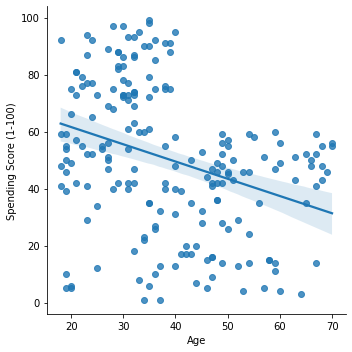

In [18]:
sns.lmplot(x='Age', y='Spending Score (1-100)', data=df_train)

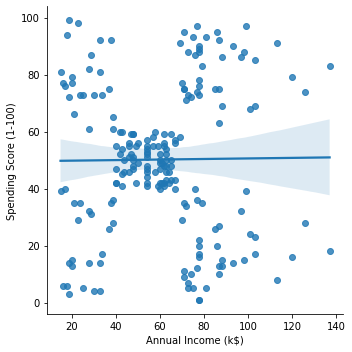

In [19]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_train)

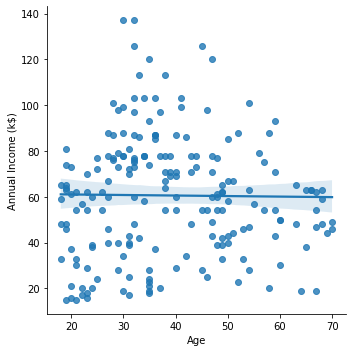

In [20]:
sns.lmplot(x='Age', y='Annual Income (k$)', data=df_train)

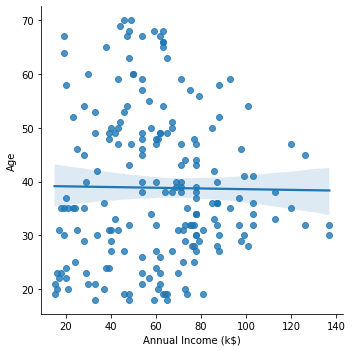

In [21]:
sns.lmplot(y='Age', x='Annual Income (k$)', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


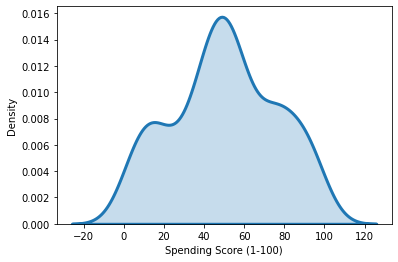

In [22]:
sns.distplot(df_train['Spending Score (1-100)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = df_train['Gender'])

In [23]:
df_male=df_train[df_train['Gender']=='Male']

In [24]:
df_female=df_train[df_train['Gender']=='Female']
df_female

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


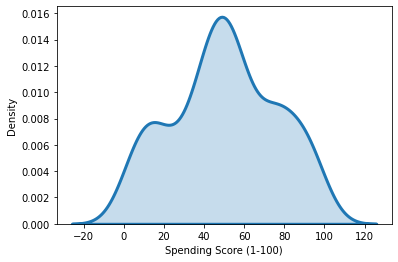

In [25]:
denplot_SS=sns.distplot(df_train['Spending Score (1-100)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
denplot_SS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


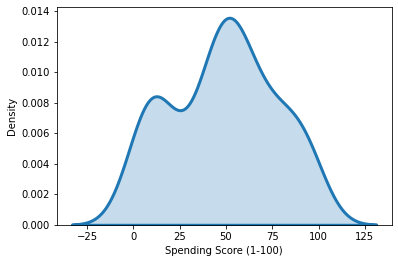

In [26]:
denplot_SS1=sns.distplot(df_male['Spending Score (1-100)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
denplot_SS1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


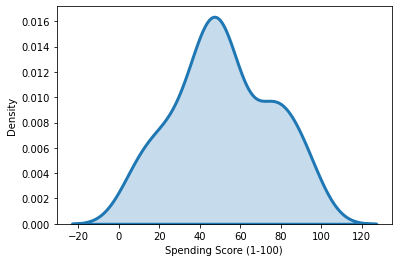

In [27]:
denplot_SS2=sns.distplot(df_female['Spending Score (1-100)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
denplot_SS2

In [28]:
#gen=['Male', 'Female']
#for gender in gen:
    #subset=df_train[df_train['Gender']==gen]
    
    #sns.distplot(subset['Spending Score (1-100)'], hist = False, kde = True,
                 #kde_kws = {'shade': True, 'linewidth': 3}, 
                  #label = gender)

In [29]:
df_train['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [30]:
df_young=df_train[df_train['Age']<=35]
df_middle=df_train[(df_train['Age']>35) & (df_train['Age']<=60)]
df_old=df_train[df_train['Age']>60]

In [31]:
#df_train.dtypes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


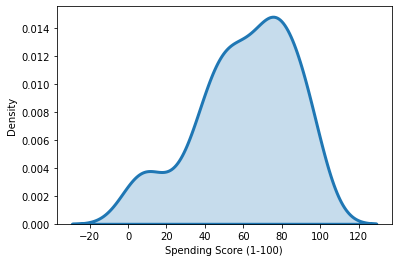

In [32]:
denplot_youngSS=sns.distplot(df_young['Spending Score (1-100)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
denplot_youngSS

Peak at 10, 50, and 80

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


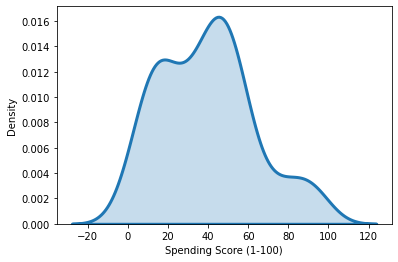

In [33]:
denplot_middleSS=sns.distplot(df_middle['Spending Score (1-100)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
denplot_middleSS

Peak at 10, 50, and 90

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


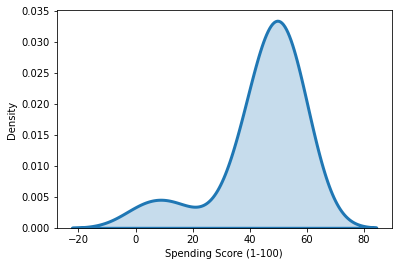

In [34]:
denplot_oldSS=sns.distplot(df_old['Spending Score (1-100)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
denplot_oldSS

Peak at 10, and 50

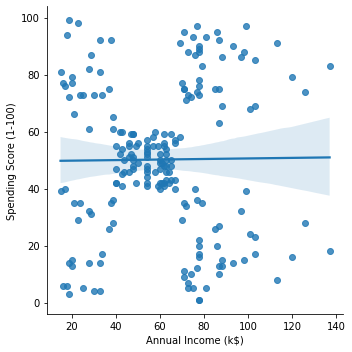

In [35]:
#clustering
#K-means clustering
import seaborn as sns
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_train)

5 clusters can be seen 

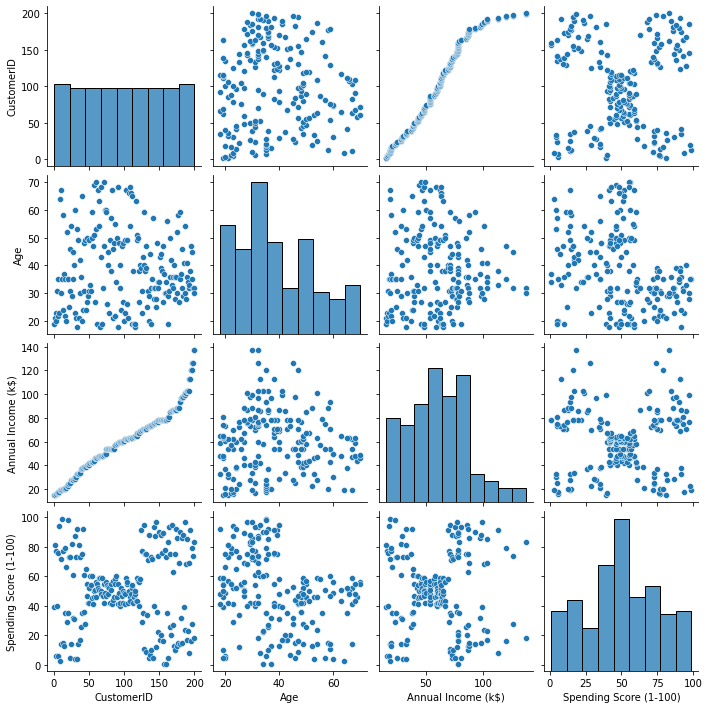

In [36]:
sns.pairplot(df_train)

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

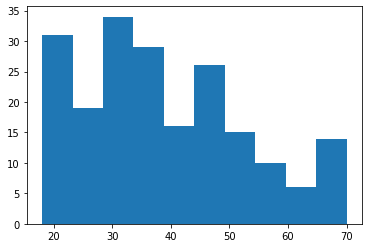

In [37]:
plt.hist(df_train['Age'])

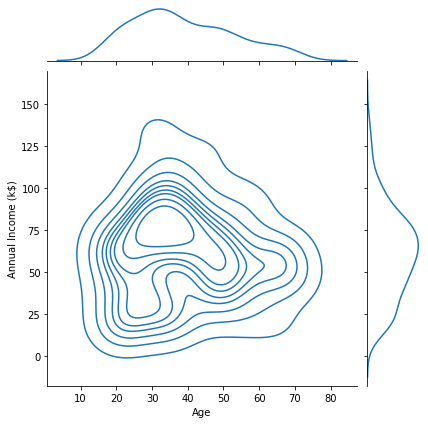

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
#data=sns.load_dataset("df_train")
sns.jointplot(x = "Age", y = "Annual Income (k$)",
              kind = "kde", data = df_train)
plt.show()

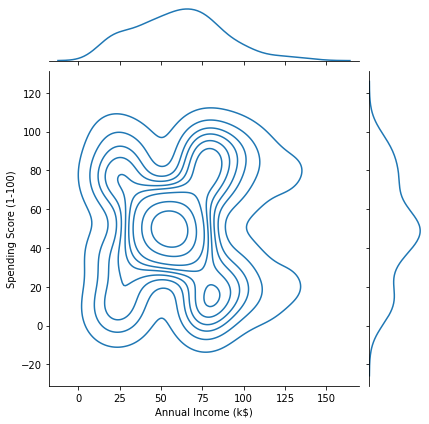

In [39]:
sns.jointplot(x = "Annual Income (k$)", y = "Spending Score (1-100)",
              kind = "kde", data = df_train)
plt.show()

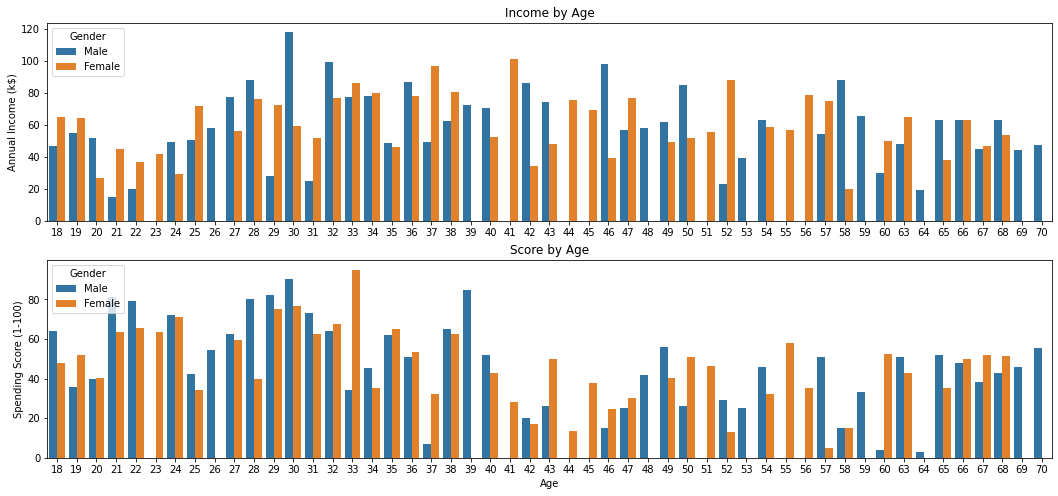

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
sns.barplot(x=df_train['Age'], y=df_train['Annual Income (k$)'], hue=df_train['Gender'], ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df_train['Age'], y=df_train['Spending Score (1-100)'], hue=df_train['Gender'], ci=0)
plt.title('Score by Age')

plt.show()

Data Preparation

In [41]:
df_train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
df_train=pd.get_dummies(df_train, columns=['Gender'], drop_first=True)
df_train=df_train.rename(columns={'Gender_Male': 'Gender'})

In [43]:
df_t=df_train.copy()
df_t.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [44]:
ss = StandardScaler()
df_t['Age']=ss.fit_transform(df_train['Age'].values.reshape(-1, 1))
df_t['Annual Income (k$)']=ss.fit_transform(df_train['Annual Income (k$)'].values.reshape(-1, 1))
df_t['Spending Score (1-100)']=ss.fit_transform(df_train['Spending Score (1-100)'].values.reshape(-1, 1))

In [45]:
df=pd.DataFrame(df_t)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,-1.424569,-1.738999,-0.434801,1
1,2,-1.281035,-1.738999,1.195704,1
2,3,-1.352802,-1.700830,-1.715913,0
3,4,-1.137502,-1.700830,1.040418,0
4,5,-0.563369,-1.662660,-0.395980,0


In [46]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score', 'Gender_1': 'Gender'}, inplace=True)

In [47]:
df.head()

,CustomerID,Age,Income,Score,Gender
0,1,-1.424569,-1.738999,-0.434801,1
1,2,-1.281035,-1.738999,1.195704,1
2,3,-1.352802,-1.700830,-1.715913,0
3,4,-1.137502,-1.700830,1.040418,0
4,5,-0.563369,-1.662660,-0.395980,0


In [48]:
df.columns

Index(['CustomerID', 'Age', 'Income', 'Score', 'Gender'], dtype='object')

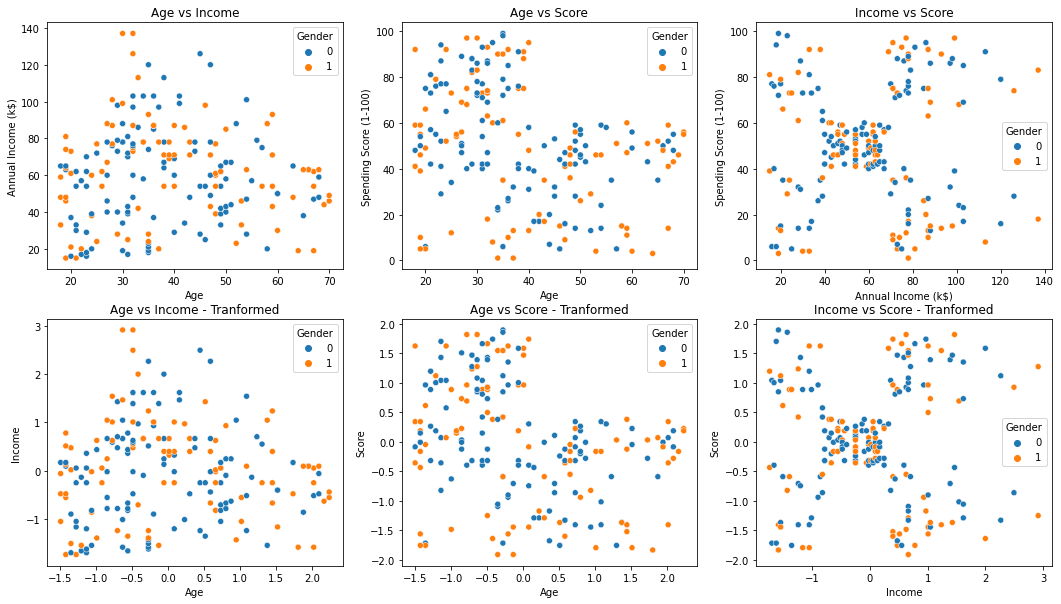

In [49]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.scatterplot(x=df_train['Age'], y=df_train['Annual Income (k$)'], hue=df_train['Gender'])
plt.title('Age vs Income')

plt.subplot(2,3,2)
sns.scatterplot(x=df_train['Age'], y=df_train['Spending Score (1-100)'], hue=df_train['Gender'])
plt.title('Age vs Score')

plt.subplot(2,3,3)
sns.scatterplot(x=df_train['Annual Income (k$)'], y=df_train['Spending Score (1-100)'], hue=df_train['Gender'])
plt.title('Income vs Score')

plt.subplot(2,3,4)
sns.scatterplot(x=df_t.Age, y=df_t.Income, hue=df_t.Gender)
plt.title('Age vs Income - Tranformed')

plt.subplot(2,3,5)
sns.scatterplot(x=df_t.Age, y=df_t.Score, hue=df_t.Gender)
plt.title('Age vs Score - Tranformed')

plt.subplot(2,3,6)
sns.scatterplot(x=df_t.Income, y=df_t.Score, hue=df_t.Gender)
plt.title('Income vs Score - Tranformed')

plt.show()


> **Clustering using KMeans**

* 2 clusters for **Age and Score**
* 5 clusters for **Income and Score**

In [50]:
df_train.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [51]:
df_Train=df_train.copy()

In [52]:
df_Train.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

In [53]:
df_Train.head()

,CustomerID,Age,Income,Score,Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [54]:
df_t.head()

,CustomerID,Age,Income,Score,Gender
0,1,-1.424569,-1.738999,-0.434801,1
1,2,-1.281035,-1.738999,1.195704,1
2,3,-1.352802,-1.700830,-1.715913,0
3,4,-1.137502,-1.700830,1.040418,0
4,5,-0.563369,-1.662660,-0.395980,0


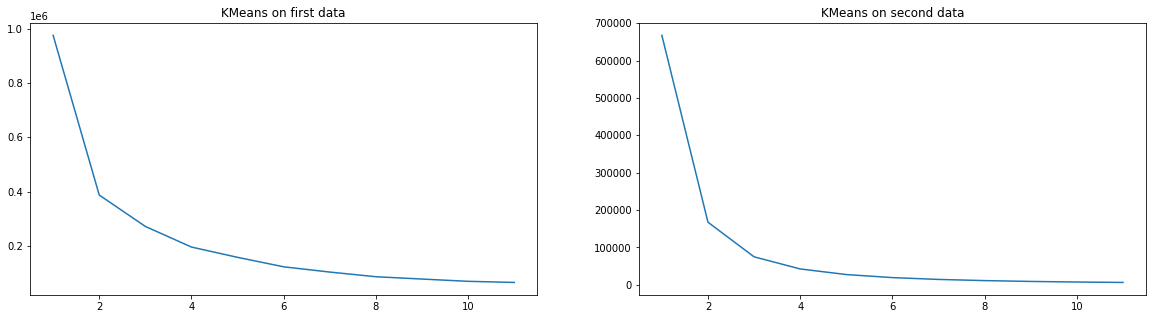

In [55]:
#First data
inertia=[]
for i in range(1, 12):
    km=KMeans(n_clusters=i).fit(df_Train)
    inertia.append(km.inertia_)
    
#Second data
inertia_t=[]
for i in range(1, 12):
    km=KMeans(n_clusters=i).fit(df_t)
    inertia_t.append(km.inertia_)
    
#plotting
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, 12), y=inertia)
plt.title('KMeans on first data')

plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, 12), y=inertia_t)
plt.title('KMeans on second data')

plt.show()

* First Data: elbow at k=2, 4
* Second Data: elbow at k=2, 3, 4, 5

In [56]:
#cluster labels and cluster centers
clusters=[2, 3, 4, 5]
cluster_centers={}

for c in clusters:
    km=KMeans(n_clusters=c).fit(df_Train[['Age', 'Income', 'Score', 'Gender']])
    df_Train['cluster' + str(c)]=km.labels_
    cluster_centers[str(c)]=km.cluster_centers_
    


In [57]:
df_Train.head()

,CustomerID,Age,Income,Score,Gender,cluster2,cluster3,cluster4,cluster5
0,1,19,15,39,1,1,0,2,2
1,2,21,15,81,1,0,0,2,1
2,3,20,16,6,0,1,0,1,2
3,4,23,16,77,0,0,0,2,1
4,5,31,17,40,0,1,0,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/di

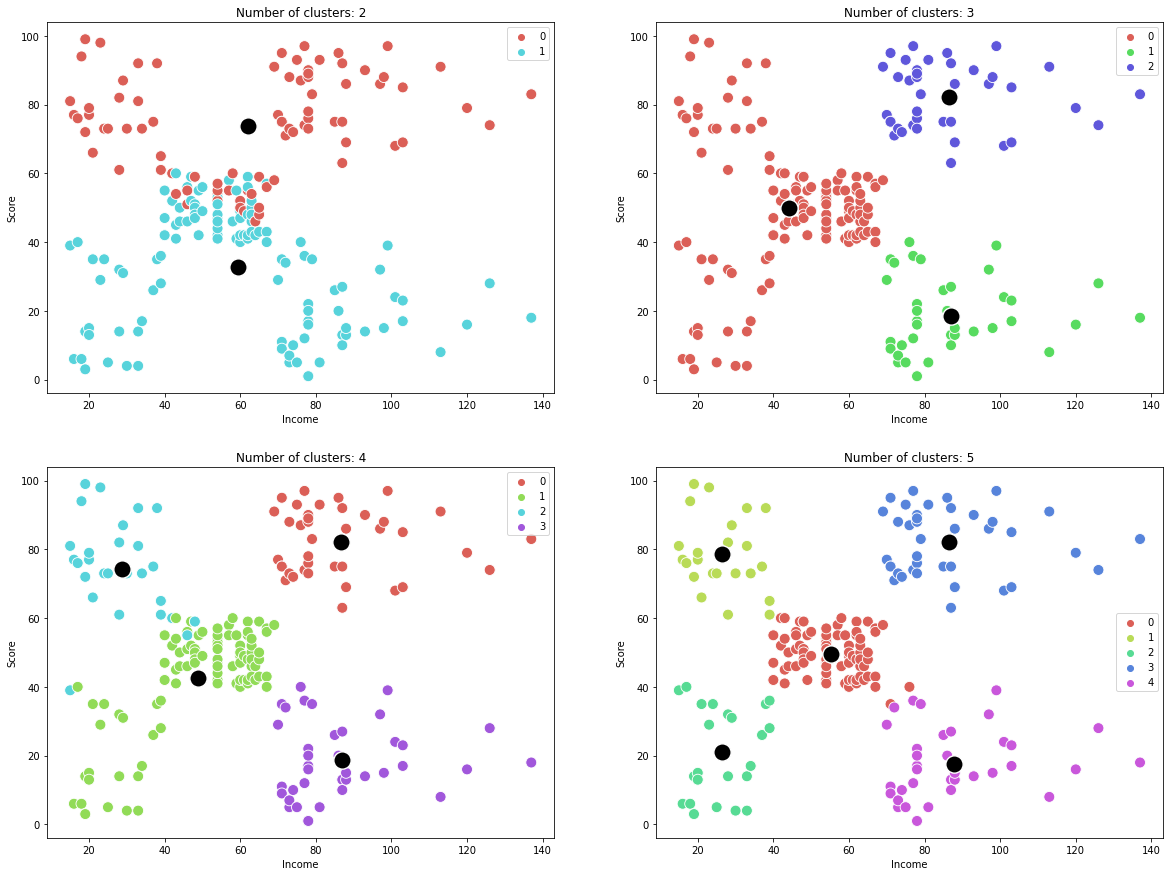

In [58]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(df_Train.Income, df_Train.Score, df_Train['cluster' + str(c)], s=120, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,1], cluster_centers[str(c)][:,2], color='black', s=300)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/di

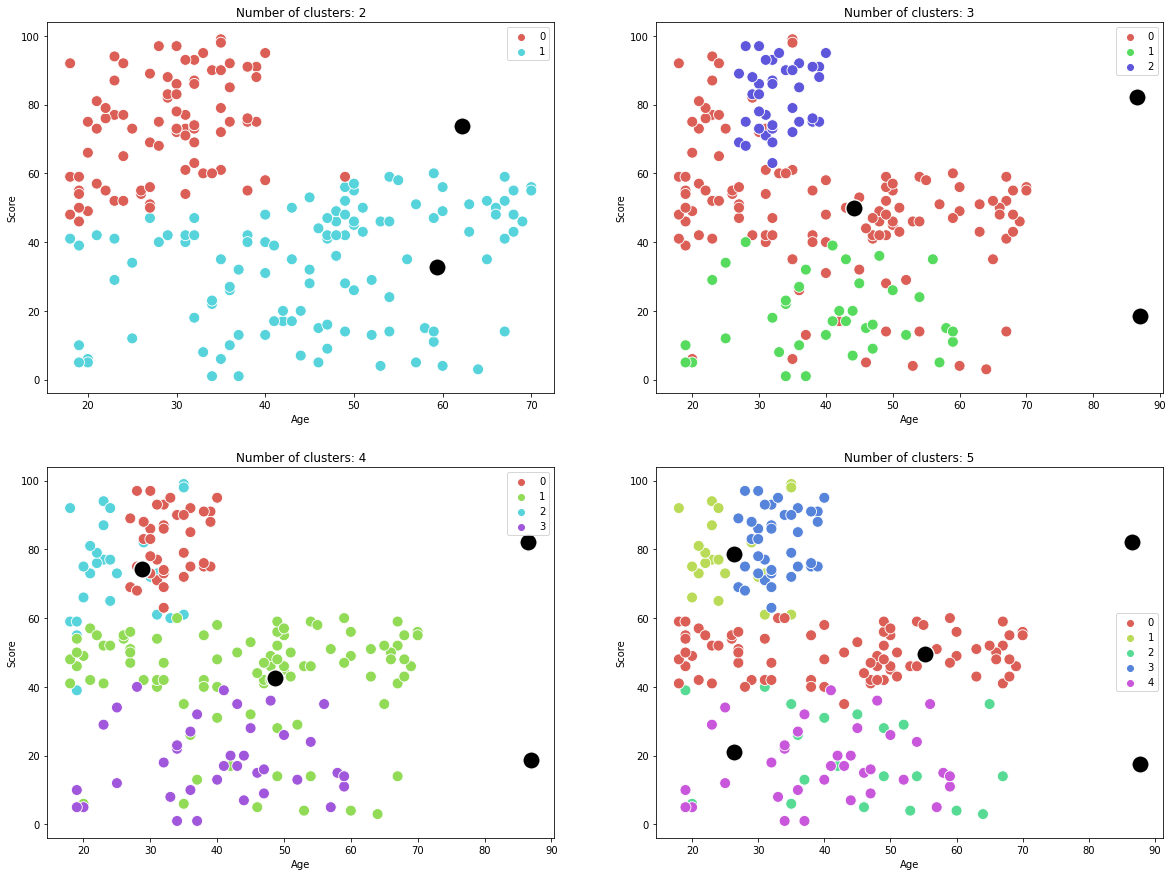

In [59]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(df_Train.Age, df_Train.Score, df_Train['cluster' + str(c)], s=120, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,1], cluster_centers[str(c)][:,2], color='black', s=300)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/di

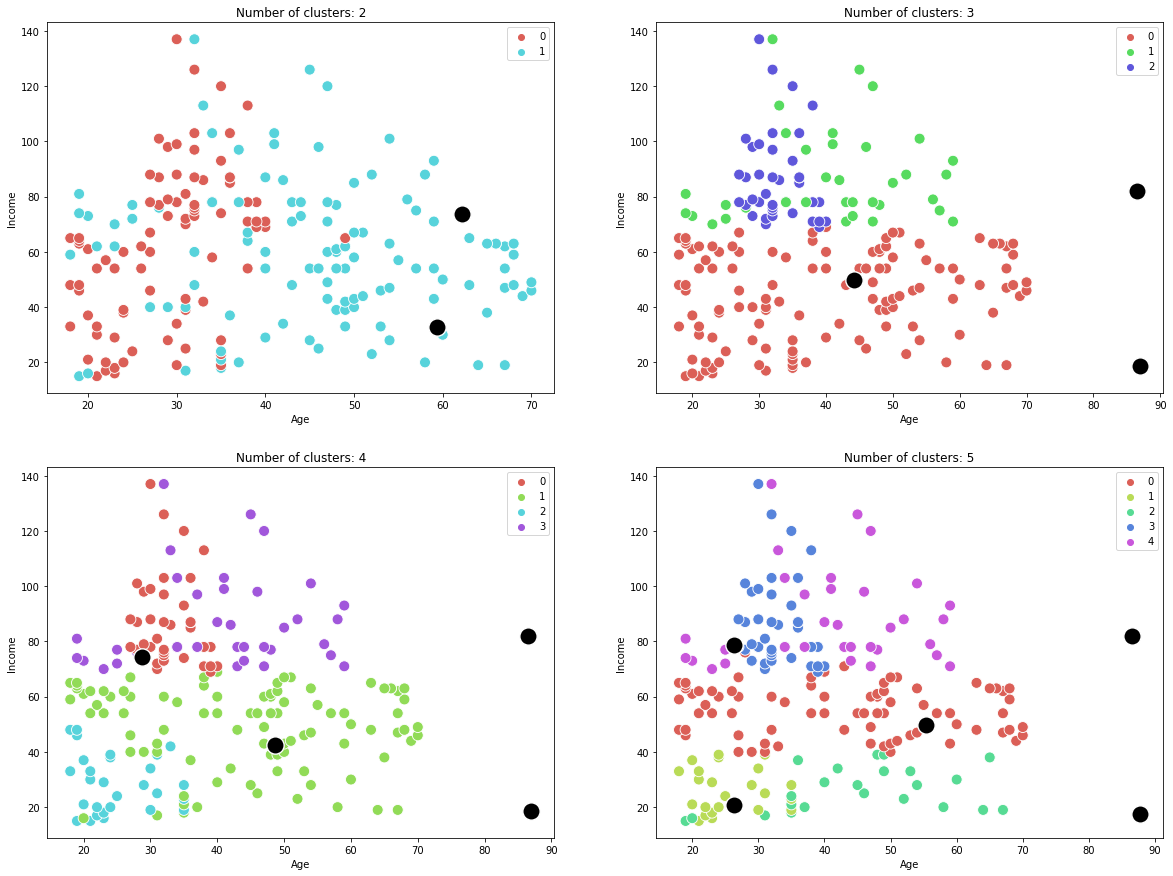

In [60]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(df_Train.Age, df_Train.Income, df_Train['cluster' + str(c)], s=120, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,1], cluster_centers[str(c)][:,2], color='black', s=300)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


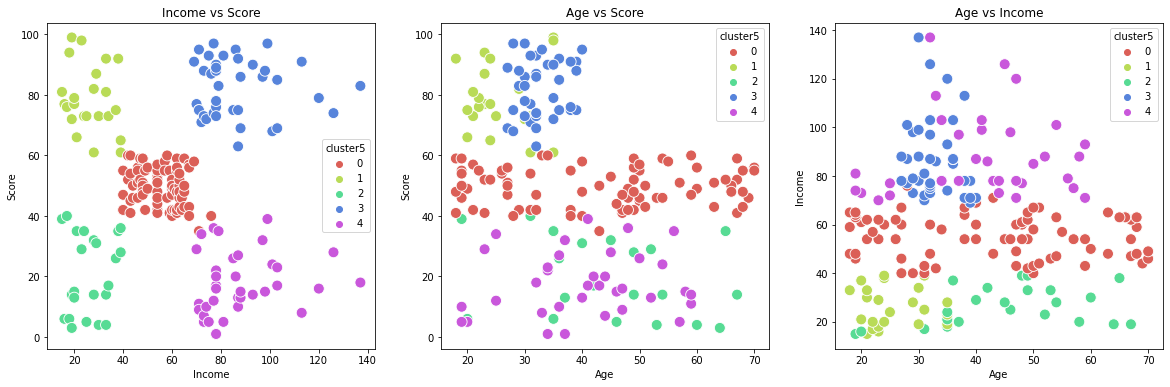

In [61]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(df_Train.Income, df_Train.Score, df_Train['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Income vs Score')
   
plt.subplot(1,3,2)
sns.scatterplot(df_Train.Age, df_Train.Score, df_Train['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Age vs Score')

plt.subplot(1,3,3)
sns.scatterplot(df_Train.Age, df_Train.Income, df_Train['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Age vs Income')

plt.show()

* Poor and not-spender - customers with low income and low spending score (cluster #4)
* Poor and spender - customers with low income, but spending a lot (cluster #0)
* Neutral - customers with mid income and mid spending score (cluster #3)
* Rich and not-spender - customers with high income and low spending score (cluster #1)
* Rich and spender - customers with high income and high spending score (cluster #2)

                        Age          Income        Spending
* Poor and non-spender:  30-70          0-40          0-40
* Poor and spender:      18-35          0-40          60-100
* Neutral:               18-70          40-75         40-60
* Rich and not-spender:  18-70          65-140        0-40
*                       (35-50 peak)   (65-100 peak)
* Rich and spender:      25-40         60-140         60-100
*                                      (60-85 peak)